In [2]:
from PIL import Image, ImageFilter
import os
from matplotlib import pyplot as plt
import cv2
import numpy as np
from rembg import remove


<function matplotlib.pyplot.show(close=None, block=None)>

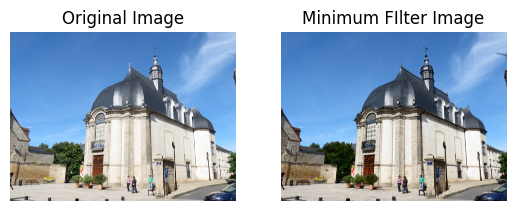

In [3]:
current_path = os.getcwd()
im = os.path.join(current_path,"Source\\MainStruture\\bibliotheque-municipale-1.jpg")

im = Image.open(im)
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Original Image")
plt.imshow(im)

im_Min = im.filter(ImageFilter.MinFilter(size = 7))
plt.subplot(1,2,2)
plt.axis('off')
plt.title("Minimum FIlter Image")
plt.imshow(im_Min)
plt.show


Add Weather

im (3000, 4000, 4)
Background (3000, 4000, 4)


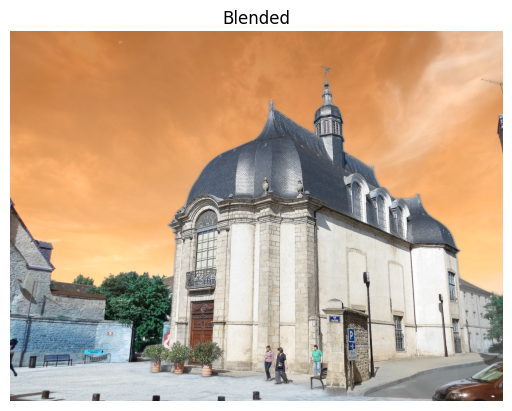

In [4]:
current_path = os.getcwd()
Background_path = os.path.join(current_path,"Source\\darkSky.jpg")

im = cv2.imread(os.path.join(current_path,"Source\\MainStruture\\bibliotheque-municipale-1.jpg"))

Background = cv2.imread(Background_path)
Background = cv2.cvtColor(Background,cv2.COLOR_BGR2RGBA)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGBA)
Background = cv2.resize(Background, (im.shape[1],im.shape[0]))

print("im", im.shape)
print("Background", Background.shape)


dest = cv2.addWeighted(Background, 0.1, im, 1, 0.0)
cv2.imwrite("Source\\Blended.png",dest)
dest = Image.open(os.path.join(current_path,"Source\\Blended.png"))



im = Image.open(os.path.join(current_path,"Source\\MainStruture\\bibliotheque-municipale-1.jpg"))
im = im.filter(ImageFilter.SHARPEN())
im = im.filter(ImageFilter.EDGE_ENHANCE_MORE())
im = remove(im)
im.save("Source\\bibliotheque_RemovedBG.png")
im.show()

im = Image.open(os.path.join(current_path,"Source\\bibliotheque_RemovedBG.png"))

Image.Image.paste(dest,im,(0,0),mask=im)
dest.save("Scene2_Dawn.png")

plt.subplot(111)
plt.axis('off')
plt.title("Blended")
plt.imshow(dest)
plt.show()

Overlay (paste) In Doves

. . . . . . . . Loop  0 Done
. . . . . . . . Loop  1 Done
. . . . . . . . Loop  2 Done
. . . . . . . . Loop  3 Done
. . . . . . . . Loop  4 Done
. . . . . . . . Loop  5 Done
. . . . . . . . Loop  6 Done
. . . . . . . . Loop  7 Done
. . . . . . . . Loop  8 Done
. . . . . . . . Loop  9 Done


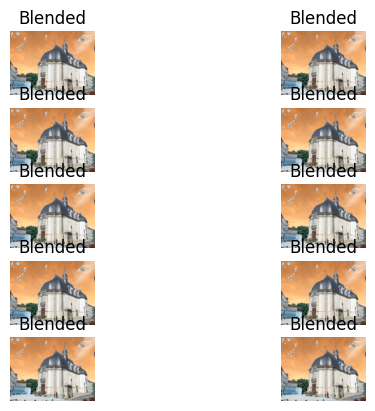

In [6]:
current_path = os.getcwd()

import random


im_path = os.path.join(current_path,"Scene2_Dawn.png")
Bird_path = os.path.join(current_path,"Source\\Dove.jpg")
Bird_path2 = os.path.join(current_path,"Source\\Dove2.jpg")
Bird_path3 = os.path.join(current_path,"Source\\Dove3.jpg")

def PasteBird(Bird_path,location=(0,0),scale=0.5, degree=0, flip = False):
    
    moveX = 3
    moveY = 4

    location = list(location)
    location[0] += moveX
    location[1] += moveY
    
    print(".", end= ' ')

    
    location = tuple(location)
    
    Bird = Image.open(Bird_path)
    Bird = Bird.resize((int(Bird.width*scale),int(Bird.height*scale)))
    Bird = remove(Bird)
    Bird.rotate(degree,expand=1)
    
    if (flip):
        Bird = Bird.transpose(Image.FLIP_LEFT_RIGHT)
    
    Image.Image.paste(im,Bird, location ,mask=Bird)


for i in range(3): #Originally 10, For git render purposed we make it 3
    im = Image.open(im_path)
    PasteBird(Bird_path)
    PasteBird(Bird_path,(600,240))
    PasteBird(Bird_path,(1600,130))
    # PasteBird(Bird_path,(1500,150))  #For git render purposed we comment it
    # PasteBird(Bird_path,(750,1500),0.25)
    # PasteBird(Bird_path,(765,1400),0.16)
    # PasteBird(Bird_path,(760,1350),0.12)
    # PasteBird(Bird_path,(800,1300),0.16)


    #Bird 2
    PasteBird(Bird_path2,(200,0),0.25)
    PasteBird(Bird_path2,(130,250),0.10)
    # PasteBird(Bird_path2,(160,270),0.10) #For git render purposed we comment it
    # PasteBird(Bird_path2,(300,250),0.13)
    # PasteBird(Bird_path2,(200,480),0.3)
    # PasteBird(Bird_path2,(2000,30),0.3)


    #Bird 3
    PasteBird(Bird_path3,(200,670),flip = True)
    PasteBird(Bird_path3,(250,500),flip = False)
    PasteBird(Bird_path3,(2800,30),1)
    # PasteBird(Bird_path3,(2600,15),0.7,flip=True) #For git render purposed we comment it
    # PasteBird(Bird_path3,(2800,6),0.2)
    # PasteBird(Bird_path3,(2750,0),0.2)

    im.thumbnail((1600,900))
    im.save("Outcome\\Completed\\Scene2_Completed" + str(i) + ".png")
    plt.subplot(5,2,i+1)
    plt.axis('off')
    plt.title("Blended")
    plt.imshow(im)
    print("Loop ",i , "Done")
plt.show()


In [7]:
a=  Image.open("Outcome\\Completed\\Scene2_Completed7.png")
print(a.size)

(1200, 900)


_To Video / GIF_

In [8]:
folder = ("D:\\Download_In_D\\3D_Python\\Scene2\\Outcome\\Completed")
images = []

def create_video_from_images(folder):
    """Generate a video from all images in the specified folder."""
    video_filename = folder + '\\Bird_Flying.mp4'
    valid_images = [i for i in os.listdir(folder) if i.endswith((".png"))]

    first_image = cv2.imread(os.path.join(folder, valid_images[0]))
    h, w, _ = first_image.shape

    codec = cv2.VideoWriter_fourcc(*'mp4v')
    vid_writer = cv2.VideoWriter(video_filename, codec, 120, (w, h))

    for img in valid_images:
        loaded_img = cv2.imread(os.path.join(folder, img))
        for _ in range(20):
            vid_writer.write(loaded_img)
        
        images.append(Image.open(os.path.join(folder, img)))
    images[0].save(folder+'\\Bird_Flying.gif',save_all = True, append_images = images[1:], optimize = False, duration = 300,loop = 0)    
    
    vid_writer.release()

create_video_from_images(folder) #Created Video and GIF

![SegmentLocal](\Outcome\Completed\Bird_Flying.gif "segment")
